# Neural Networks Assignment

### <font color='blue'>Notes</font>

<font color='blue'>1. In this assignment, different combinations of hyperparameters have been attempted. The models are run for multiple combinations. As a result, the overall notebook execution time is about 30 minutes. Kindly be patient until the notebook executes fully :-) 

<font color='blue'>2. Part 1 and Part 2 of the Assignment have been automated using a GUI in the following sequence</font>
<font color='blue'><li>Using the GUI, the user can "Import Data" from a .csv file</li></font>
<font color='blue'><li>Using the GUI, the user can "Import target variable", which finds the target variable in the data set</li></font>
<font color='blue'><li>If target variable is found, the user can "Continue to Pre-process data". At this point the GUI closes and the notebook execution continues</li></font>
<font color='blue'><li>When notebook comes to the point of Part 1 model execution, the GUI is invoked again. The user can click on Regression-->"Train" to train the Neural Network Regressor for Part 1</li></font>
<font color='blue'><li>The user can then click on Regression-->"Pickle" to save the Neural Network Regressor model weights on to the disk</li></font>
<font color='blue'><li>The user can then click on "Continue to Part 2 - Classification to proceed to Part 2. The control comes back to the notebook, at this time</li></font>
<font color='blue'><li>We have used 3 optimizers in Part 2 (SGD, Adam, Adagrad). When notebook comes to the point of training using Adam optimizer, the GUI is invoked again. The user can click on Classification-->"Train" to train the Neural Network Classifier for Part 2. </li></font>
<font color='blue'><li>The user can then click on Classification-->"Pickle" to save the Neural Network Adam Classifier  model weights on to the disk</li></font>
<font color='blue'><li>The user can then "Click to Proceed" wherein the GUI closes and the notebook execution continues to its completion</li></font>

## Part 1 - Neural Network - Signal Strength Regressor

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

import tensorflow
tensorflow.__version__
import tkinter as tk
from tkinter import ttk
import re

d:\spyder\envs\py36-test\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\spyder\envs\py36-test\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\spyder\envs\py36-test\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\spyder\envs\py36-test\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.core.display import HTML, display
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
div.text_cell_render {
font-family: "Trebuchet MS", "Helvetica", sans-serif;
}
</style>
""")

In [4]:
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td style='color:#6C3483'><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

#### <font color='blue'>At this time, we launch the GUI to load the data from the .CSV file and find if the target variable is present</font>

In [5]:
if __name__ == "__main__": 
    # create a GUI window 
    win = tk.Tk() 
    

    # set the background colour of GUI window 
    win.configure(background="gray") 
 
    # set the title of GUI window 
    win.title("Neural Networks GUI - Great Learning") 
 
    # set the configuration of GUI window 
    win.geometry("1000x500") 
    
    #File Name
    filename = ttk.Label(win,width=30,text="Step 1 : File Name")
    filename.grid(row=0,column=0,sticky=tk.W)
    
    filename_var = tk.StringVar()
    filename_entryBox = ttk.Entry(win,width=24,textvariable=filename_var)
    filename_entryBox.grid(row=0,column=2,sticky=tk.W)
    
    def Import_Data():
        global pdata
        global df_Name
        df_Name=filename_var.get()
        DB_Extension=re.findall("\..*",df_Name)
        if DB_Extension==['.xlsx']:
            pdata=pd.read_excel(df_Name)
        elif DB_Extension==['.csv']:
            pdata=pd.read_csv(df_Name)
        confirm="Done"
        Confirm_entrybox=ttk.Entry(win,width=16)
        Confirm_entrybox.grid(row=0,column=6)
        Confirm_entrybox.insert(1,str(confirm))
        
    Import_Data_Button = ttk.Button(win, text='Import Data',command=Import_Data)
    Import_Data_Button.grid(row=0,column=4)

    #Target Column
    tgtcol_name = ttk.Label(win,width=30,text="Step 2 : Target Column")
    tgtcol_name.grid(row=2,column=0,sticky=tk.W)
    
    tgtcol_var = tk.StringVar()
    tgtcol_entryBox = ttk.Entry(win,width=24,textvariable=tgtcol_var)
    tgtcol_entryBox.grid(row=2,column=2,sticky=tk.W)
    
    def Load_TargetCol():
        global tgtcol_val
        tgtcol_val=tgtcol_var.get()
        if tgtcol_val in pdata.columns:
            confirm="Found"
            Proceed_Button = ttk.Button(win, width=30,text='Continue to Pre-process Data',command=PreProcess_Data)
            Proceed_Button.grid(row=4,column=0)
        else:
            confirm="Not Found"
        Confirm_entrybox=ttk.Entry(win,width=16)
        Confirm_entrybox.grid(row=2,column=6)
        Confirm_entrybox.insert(1,str(confirm))

    Load_TargetCol_Button = ttk.Button(win, text='Import Target',command=Load_TargetCol)
    Load_TargetCol_Button.grid(row=2,column=4)
    
    def PreProcess_Data():
        win.destroy()
        
    # start the GUI 
    win.mainloop()

#### Load the data set, print the shape of the data and visualize sample data

In [6]:
#pdata = pd.read_csv("Part- 1,2&3 - Signal.csv")
print("Loaded data set from ",df_Name)
print("The target column ",tgtcol_val," is found in the data set")

print("Shape of the data set is ",pdata.shape)
pdata.head(10)

Loaded data set from  Part- 1,2&3 - Signal.csv
The target column  Signal_Strength  is found in the data set
Shape of the data set is  (1599, 12)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### There are 11 independent variables Paramater1 to Parameter11 and one dependent variable Signal_Strength. 

#### It is observed that the independent variables have different ranges and hence may need normalization before any model training is done. 

#### There are many rows with values of 0. In this assignment, 0 is treated as valid values for the attributes and not considered as missing values. Hence, missing value imputation is not performed for the attributes

In [7]:
pdata.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

#### There are 11 independent numeric variables (float) and one dependent numeric variable "Signal_Strength" (int)

#### Check for missing values

In [8]:
n_missingvalues=pdata.isnull().values.sum() + pdata.isna().values.sum()

if (n_missingvalues ==0):
    print ("There are no missing values in the data")
else:
    print ("There are",n_missingvalues,"missing values in the data")

There are no missing values in the data


#### There are no missing values (null/NaN) across the data and hence there is no need for missing value  imputation 

#### 5-point attribute summary

In [9]:
pdata.describe().loc[['min','25%','50%','mean','75%','max']].T

,min,25%,50%,mean,75%,max
Parameter 1,4.60000,7.1000,7.90000,8.319637,9.200000,15.90000
Parameter 2,0.12000,0.3900,0.52000,0.527821,0.640000,1.58000
Parameter 3,0.00000,0.0900,0.26000,0.270976,0.420000,1.00000
Parameter 4,0.90000,1.9000,2.20000,2.538806,2.600000,15.50000
Parameter 5,0.01200,0.0700,0.07900,0.087467,0.090000,0.61100
Parameter 6,1.00000,7.0000,14.00000,15.874922,21.000000,72.00000
Parameter 7,6.00000,22.0000,38.00000,46.467792,62.000000,289.00000
Parameter 8,0.99007,0.9956,0.99675,0.996747,0.997835,1.00369
Parameter 9,2.74000,3.2100,3.31000,3.311113,3.400000,4.01000
Parameter 10,0.33000,0.5500,0.62000,0.658149,0.730000,2.00000


#### The value of Signal_Strength varies between 3 to 8. We could treat  this either as a regression or a multi-class classification problem

#### It is observed that the mean-median difference for a few parameters are high, indicating skewness that may need to be corrected

#### Distribution plot and Skewness values

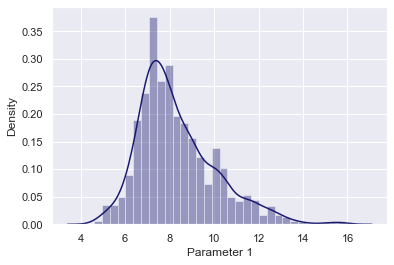

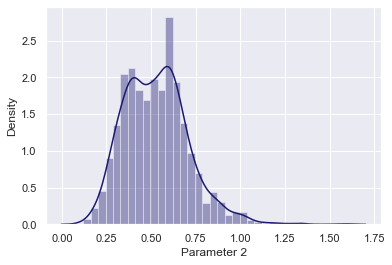

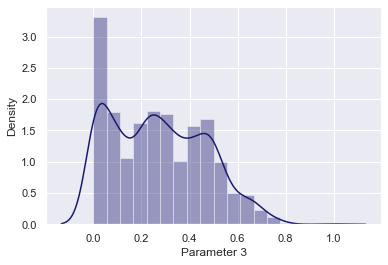

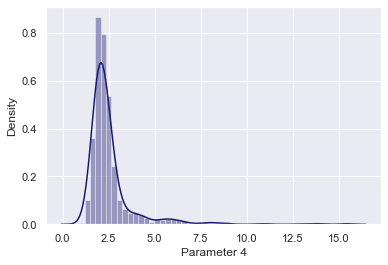

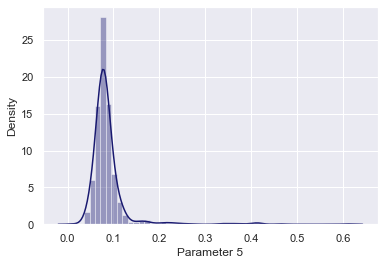

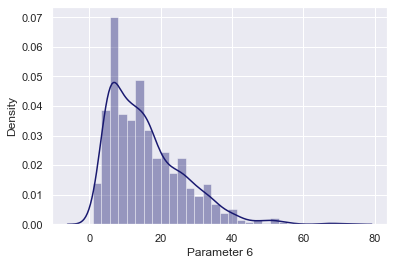

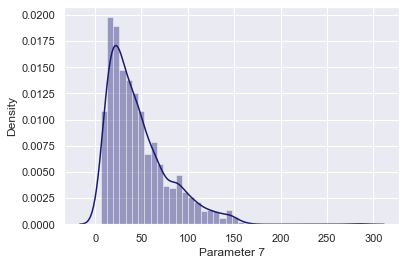

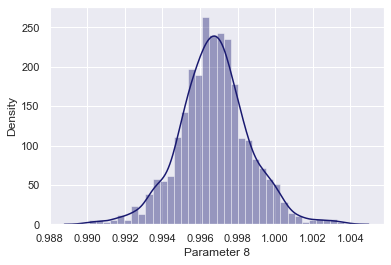

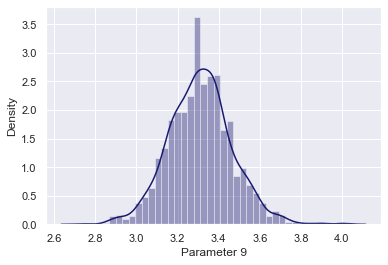

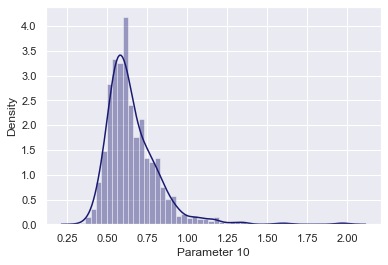

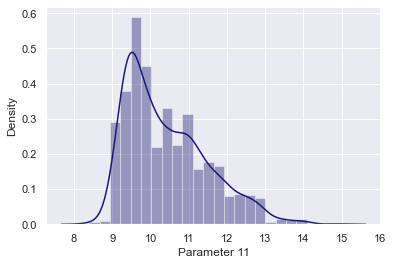

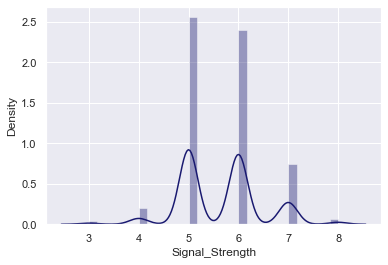

In [10]:
for i in pdata.columns:
    plt.figure(i)
    sns.distplot(pdata[i],color = 'midnightblue');

In [11]:
table=[['Attribute','Skewness']]
for i in pdata.columns:
    l = [i,round(pdata[i].skew(),2)]
    table.append(l)
display_table(table)

#### From the distribution plots and skewness values, it is observed that Paramters 1,4,5,6,7,10 have highly skewed distributions

#### Box plots

<AxesSubplot:>

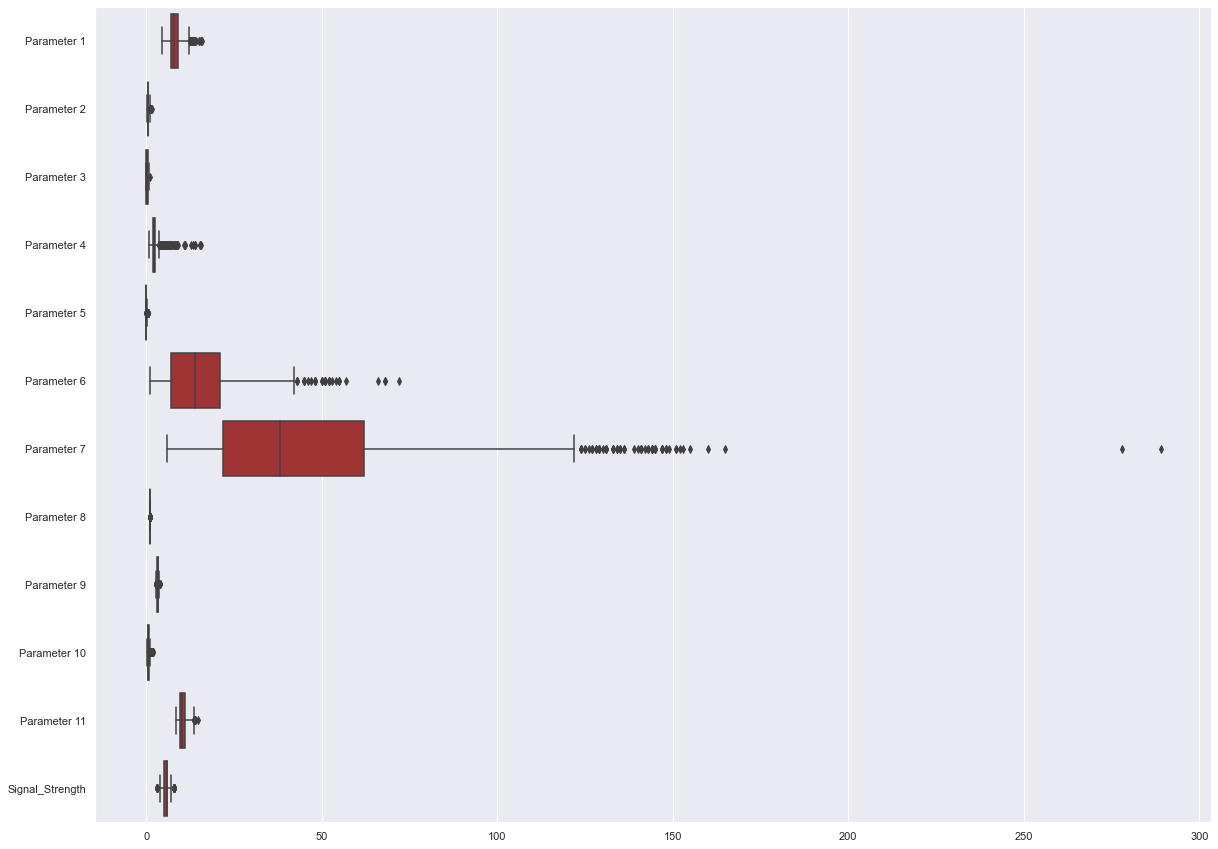

In [12]:
plt.subplots(figsize=(20,15))
sns.boxplot(data=pdata,orient='h', color="firebrick")

#### We can see that there are outliers for many of the parameters. Specifically, Parameters 1,4,6,7 have large number of outliers. We need to perform outlier treatment before performing any model training

#### In the following block of code, we are treating outliers for Parameters 1,4,5,6,7,10 using a median strategy

In [13]:
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation 
    outliers = (group - median).abs() > 2*std # Subtract median from every member. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

p1=pdata['Parameter 1']
pdata.drop(['Parameter 1'],axis=1)
p1_outc = (p1.transform(replace)) 
pdata.add(p1_outc,axis=0)

p4=pdata['Parameter 4']
pdata.drop(['Parameter 4'],axis=1)
p4_outc = (p4.transform(replace)) 
pdata.add(p4_outc,axis=0)

p5=pdata['Parameter 5']
pdata.drop(['Parameter 5'],axis=1)
p5_outc = (p5.transform(replace)) 
pdata.add(p5_outc,axis=0)

p6=pdata['Parameter 6']
pdata.drop(['Parameter 6'],axis=1)
p6_outc = (p6.transform(replace)) 
pdata.add(p6_outc,axis=0)

p7=pdata['Parameter 7']
pdata.drop(['Parameter 7'],axis=1)
p7_outc = (p7.transform(replace)) 
pdata.add(p7_outc,axis=0)

p10=pdata['Parameter 10']
pdata.drop(['Parameter 10'],axis=1)
p10_outc = (p10.transform(replace)) 
pdata.add(p10_outc,axis=0)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.96,1.260,0.56,2.46,0.636,11.56,34.56,1.55780,4.07,1.12,9.96,5.56
1,8.48,1.560,0.68,3.28,0.778,25.68,67.68,1.67680,3.88,1.36,10.48,5.68
2,8.45,1.410,0.69,2.95,0.742,15.65,54.65,1.64700,3.91,1.30,10.45,5.65
3,11.78,0.860,1.14,2.48,0.655,17.58,60.58,1.57800,3.74,1.16,10.38,6.58
4,7.96,1.260,0.56,2.46,0.636,11.56,34.56,1.55780,4.07,1.12,9.96,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.78,1.180,0.66,2.58,0.670,32.58,44.58,1.57490,4.03,1.16,11.08,5.58
1595,6.66,1.310,0.86,2.96,0.822,14.76,51.76,1.75512,4.28,1.52,11.96,6.76
1596,7.05,1.260,0.88,3.05,0.826,29.75,40.75,1.74574,4.17,1.50,11.75,6.75
1597,6.61,1.355,0.83,2.71,0.785,32.71,44.71,1.70547,4.28,1.42,10.91,5.71


#### Let us visualize the box plots and calculate data skewness after outlier treatment

<AxesSubplot:>

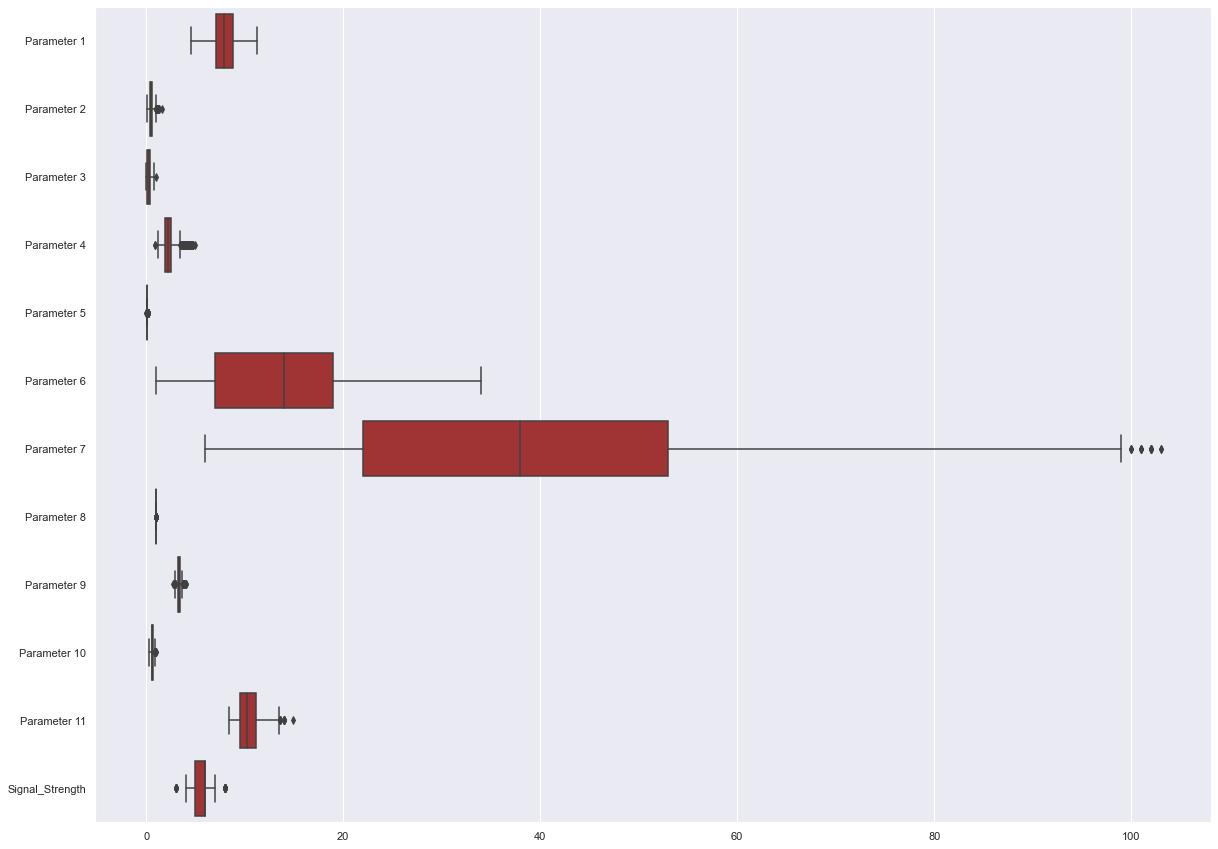

In [14]:
plt.subplots(figsize=(20,15))
sns.boxplot(data=pdata,orient='h', color="firebrick")

In [15]:
table=[['Attribute','Skewness']]
for i in pdata.columns:
    l = [i,round(pdata[i].skew(),2)]
    table.append(l)
display_table(table)

#### From the above table, we can see that the skewness of parameters has been mostly addressed. This is also seen from the Box plots, where the outliers have been significantly reduced for a few parameters. 

#### Let us visualize the correlation between the different parameters

<AxesSubplot:>

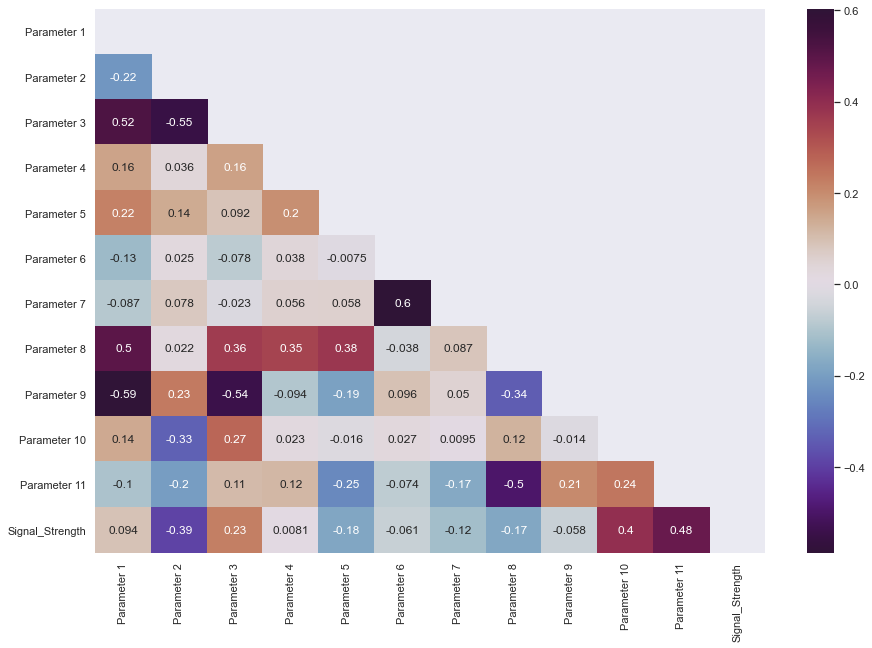

In [16]:
plt.subplots(figsize=(15,10))
matrix = np.triu(pdata.corr())
sns.heatmap(pdata.corr(),cmap='twilight_shifted',annot=True, mask=matrix)

#### Of the 11 parameters, Signal_Strength shows a moderate positive correlation with Parameters 10 (0.4), 11 (0.48), moderate negative correlation with Parameter 2 (-0.39). There is no significant correlation with any other parameters

#### Let us visualize the Pairplot for the data set

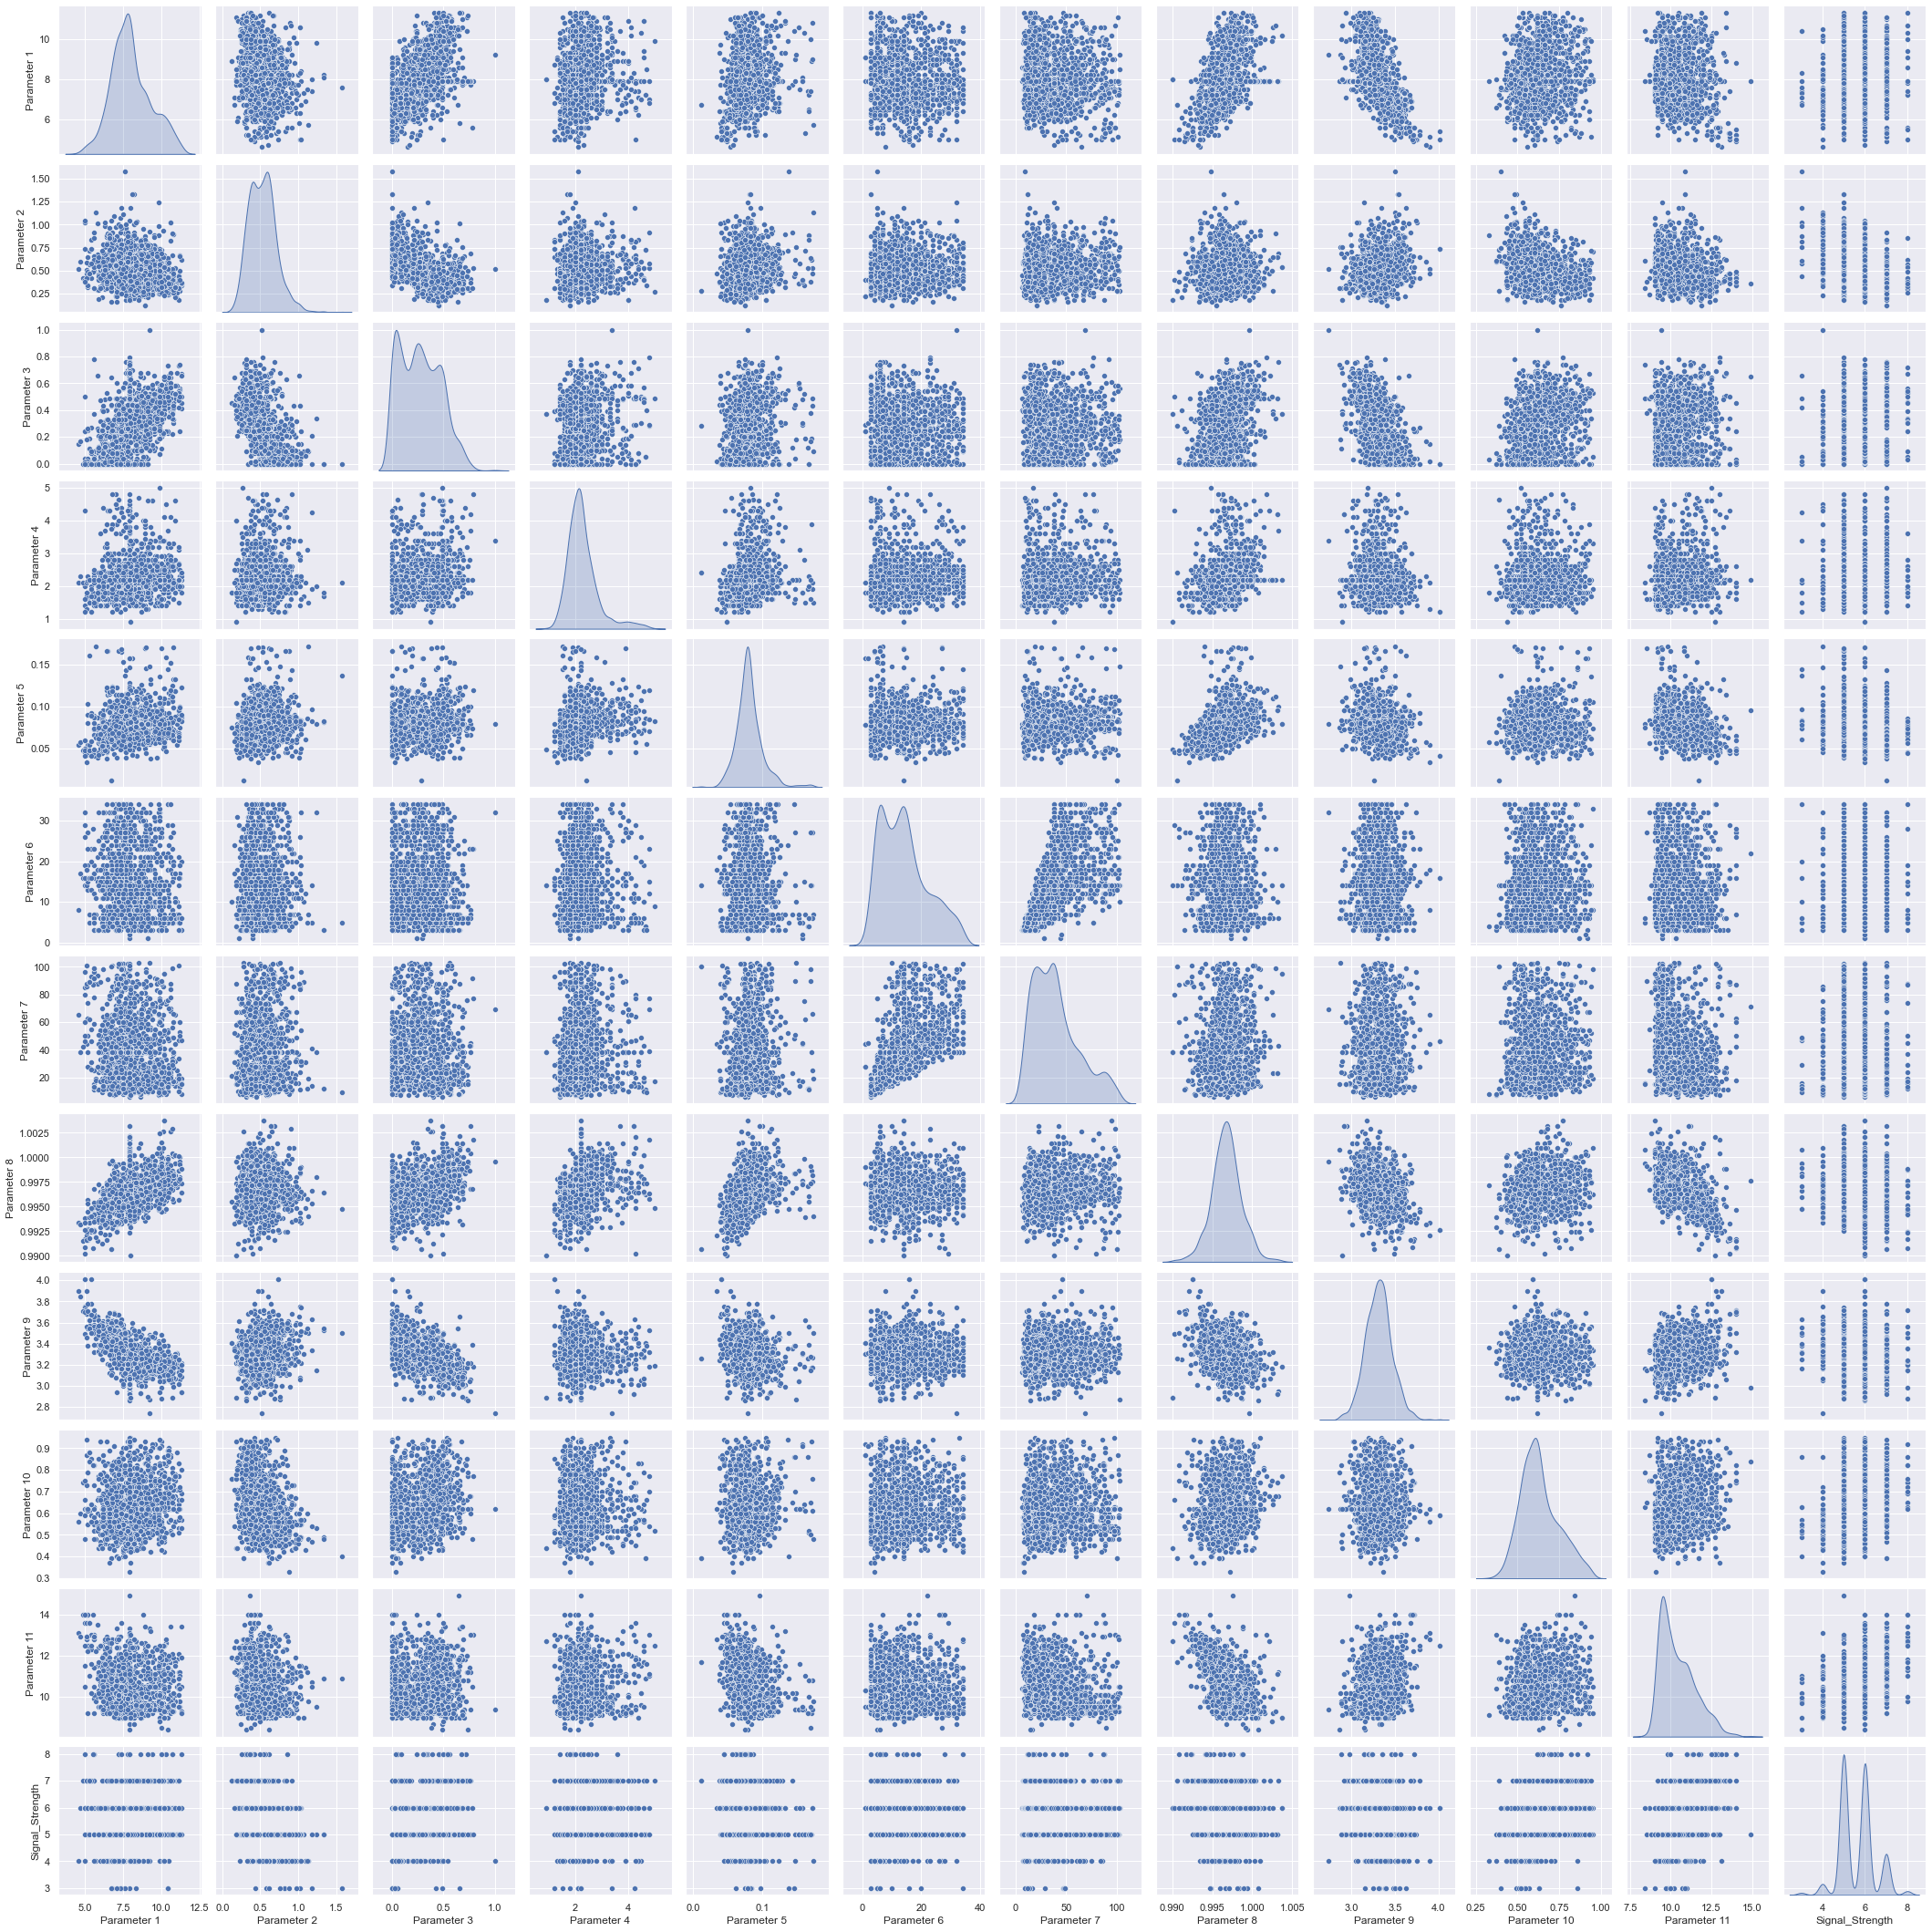

In [17]:
sns.pairplot(pdata,diag_kind='kde')

#### Prepare the data sets for training by 
#### 1. Splitting the independent variables and dependent variable
#### 2. Splitting the independent variables into training and validation data sets
#### 3. Scale the training and validation data sets to normalize them

In [18]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

y = pdata['Signal_Strength']
X = pdata.drop(['Signal_Strength'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=59)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

#### We will create a vanilla Neural Network with 1 input Layer , 2 hidden layers (7 neurons, 3 neurons) and 1 output layer. We will use 'Relu' as the activation function

In [19]:
n_epochs=100
# Input Layer
input_layer = tensorflow.keras.layers.Input(shape=(X.shape[1],))

#Hidden Layer 1
dense_layer_1 = tensorflow.keras.layers.Dense(7, activation='relu')(input_layer)

#Hidden Layer 2
dense_layer_2 = tensorflow.keras.layers.Dense(3, activation='relu')(dense_layer_1)

# Final output layer for prediction
output = tensorflow.keras.layers.Dense(1)(dense_layer_2)

#Assemble the model
model = tensorflow.keras.models.Model(inputs=input_layer, outputs=output)

#### We will use SGD optimizer to train the model and since this is a Regressor, we will use 'mean_squared_error' as the metric to be monitored

#### <font color='blue'>Compile and train the neural network using SGD optimizer. The Notebook processing pauses here so that we can use the GUI for training the model and saving the weights. The notebook continues to process after this step</font>

In [20]:
if __name__ == "__main__": 
    # create a GUI window 
    win = tk.Tk() 

    # set the background colour of GUI window 
    win.configure(background="gray") 
 
    # set the title of GUI window 
    win.title("Neural Networks GUI - Great Learning") 
 
    # set the configuration of GUI window 
    win.geometry("1000x500") 
    
    #File Name
    filename = ttk.Label(win,width=30,text="Step 1 : Data loaded from:")
    filename.grid(row=0,column=0,sticky=tk.W)

    filename_val = ttk.Label(win,width=30,text=df_Name)
    filename_val.grid(row=0,column=2,sticky=tk.W)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=4,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=4,column=2)
    
    #Target Column
    tgtcol_name = ttk.Label(win,width=30,text="Step 2 : Target Column Found as:")
    tgtcol_name.grid(row=6,column=0,sticky=tk.W)

    tgtcol_name_val = ttk.Label(win,width=30,text=tgtcol_val)
    tgtcol_name_val.grid(row=6,column=2,sticky=tk.W)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=8,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=8,column=2)
    
    def Train_Regression():
        
        global history
        
        # Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
        model.compile(optimizer='sgd', loss='mean_squared_error',metrics=["mean_squared_error"])
        # Run the model for chosen hyperparameters
        history = model.fit(X_train, y_train, batch_size=100,epochs=n_epochs, validation_split=0.3)
        
        Confirm_entrybox=ttk.Entry(win,width=24)
        Confirm_entrybox.grid(row=12,column=6)
        Confirm_entrybox.insert(1,str("Network Trained"))


    def Save_Model():
        # Save the model weights for future use
        model.save_weights("ss_regressor")
        Confirm_entrybox=ttk.Entry(win,width=24)
        Confirm_entrybox.grid(row=14,column=6)
        Confirm_entrybox.insert(1,str("Saved Model to Disk"))
        
        Proceed_Button = ttk.Button(win, width=48,text='Continue to Part 2 - Classification',command=PreProcess_Data)
        Proceed_Button.grid(row=16,column=6)

    def PreProcess_Data():
        win.destroy()
        
    #Neural Network Regressor
    nn_res = ttk.Label(win,width=30,text="Step 3 : Neural Network Regressor")
    nn_res.grid(row=10,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=10,column=2)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=12,column=0)

    nn_res = ttk.Label(win,width=30,text="Regression")
    nn_res.grid(row=12,column=2,sticky=tk.W)
    
    Run_Reg_Button = ttk.Button(win, text='Train',command=Train_Regression)
    Run_Reg_Button.grid(row=12,column=4)

    Save_Model_Button = ttk.Button(win, text='Pickle',command=Save_Model)
    Save_Model_Button.grid(row=14,column=4)

    nn_res = ttk.Label(win,width=30,text="Step 3 : Neural Network Regressor")
    nn_res.grid(row=10,column=0)

    
    # start the GUI 
    win.mainloop()
    

Train on 839 samples, validate on 360 samples
Epoch 1/100
839/839 [==============================] - 0s 531us/sample - loss: 34.1534 - mean_squared_error: 34.1534 - val_loss: 32.6387 - val_mean_squared_error: 32.6387
Epoch 2/100
839/839 [==============================] - 0s 14us/sample - loss: 30.3055 - mean_squared_error: 30.3055 - val_loss: 29.3236 - val_mean_squared_error: 29.3236
Epoch 3/100
839/839 [==============================] - 0s 14us/sample - loss: 27.1060 - mean_squared_error: 27.1060 - val_loss: 26.3186 - val_mean_squared_error: 26.3186
Epoch 4/100
839/839 [==============================] - 0s 13us/sample - loss: 24.1532 - mean_squared_error: 24.1532 - val_loss: 23.4375 - val_mean_squared_error: 23.4375
Epoch 5/100
839/839 [==============================] - 0s 13us/sample - loss: 21.3089 - mean_squared_error: 21.3089 - val_loss: 20.5867 - val_mean_squared_error: 20.5867
Epoch 6/100
839/839 [==============================] - 0s 13us/sample - loss: 18.5285 - mean_squared_er

839/839 [==============================] - 0s 11us/sample - loss: 1.6867 - mean_squared_error: 1.6867 - val_loss: 1.7341 - val_mean_squared_error: 1.7341
Epoch 50/100
839/839 [==============================] - ETA: 0s - loss: 1.7412 - mean_squared_error: 1.74 - 0s 13us/sample - loss: 1.6625 - mean_squared_error: 1.6625 - val_loss: 1.7087 - val_mean_squared_error: 1.7087
Epoch 51/100
839/839 [==============================] - 0s 13us/sample - loss: 1.6389 - mean_squared_error: 1.6389 - val_loss: 1.6885 - val_mean_squared_error: 1.6885
Epoch 52/100
839/839 [==============================] - 0s 13us/sample - loss: 1.6147 - mean_squared_error: 1.6147 - val_loss: 1.6678 - val_mean_squared_error: 1.6678
Epoch 53/100
839/839 [==============================] - 0s 12us/sample - loss: 1.5932 - mean_squared_error: 1.5932 - val_loss: 1.6473 - val_mean_squared_error: 1.6473
Epoch 54/100
839/839 [==============================] - 0s 11us/sample - loss: 1.5714 - mean_squared_error: 1.5714 - val_loss:

839/839 [==============================] - 0s 12us/sample - loss: 1.0279 - mean_squared_error: 1.0279 - val_loss: 1.0714 - val_mean_squared_error: 1.0714
Epoch 98/100
839/839 [==============================] - 0s 13us/sample - loss: 1.0207 - mean_squared_error: 1.0207 - val_loss: 1.0638 - val_mean_squared_error: 1.0638
Epoch 99/100
839/839 [==============================] - 0s 11us/sample - loss: 1.0137 - mean_squared_error: 1.0137 - val_loss: 1.0563 - val_mean_squared_error: 1.0563
Epoch 100/100
839/839 [==============================] - 0s 13us/sample - loss: 1.0071 - mean_squared_error: 1.0071 - val_loss: 1.0484 - val_mean_squared_error: 1.0484


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(round(np.sqrt(mean_squared_error(y_train,pred_train)),2))

pred = model.predict(X_val)
print(round(np.sqrt(mean_squared_error(y_val,pred)),2))

1.01
1.06


#### The training and validation loss numbers are almost the same 

#### Visualize the model performance by plotting the Training and Validation Loss against # of epochs. 

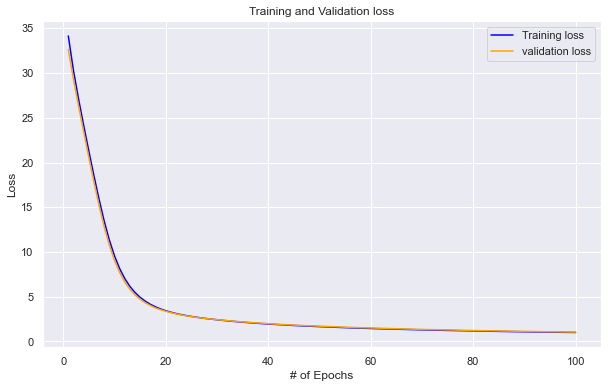

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### It can be seen that both training and validation losses (MSEs) decrease steadily with the number of epochs. The learning rate is very high in the initial 15 epochs, as suggested by the steep fall in the loss. After 20-25 epochs, the curve flattens out indicating that the learning rate has reduced. 

#### The training and validation loss are pretty much same, indicating that there is no overfitting and the model performance is optimal.

#### The training and validation loss (MSE) follow the same curve as the loss and values are close to each other, which is expected from a well-performing model

#### In order to save computing resources, we need not have trained the model beyond 40 epochs, after which the learning rate is very slow. However, since this is a sparse data set that can be trained easily and for the sake of illustration, we have chosen to display the model performance across 100 epochs

#### Display the model summary

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


#### Next we use the trained model to predict the values from the validation data set and compare them with actual values

In [24]:
for i in range(X_val.shape[0]):
    x1=np.reshape(X_val[i],(-1,X_train.shape[1]))
    y_pred=model.predict(x1)
    print("Predicted:",y_pred,"Actual:",y_val.iloc[i])

Predicted: [[6.215003]] Actual: 5
Predicted: [[4.6354227]] Actual: 6
Predicted: [[5.90081]] Actual: 6
Predicted: [[5.888026]] Actual: 6
Predicted: [[5.181664]] Actual: 5
Predicted: [[4.745942]] Actual: 5
Predicted: [[5.638355]] Actual: 4
Predicted: [[6.9639487]] Actual: 5
Predicted: [[5.294549]] Actual: 5
Predicted: [[5.280646]] Actual: 5
Predicted: [[5.577697]] Actual: 5
Predicted: [[5.666135]] Actual: 5
Predicted: [[5.587216]] Actual: 6
Predicted: [[4.5585823]] Actual: 5
Predicted: [[6.33919]] Actual: 6
Predicted: [[5.3400264]] Actual: 6
Predicted: [[6.827532]] Actual: 6
Predicted: [[4.0880594]] Actual: 6
Predicted: [[4.7235003]] Actual: 5
Predicted: [[6.347344]] Actual: 6
Predicted: [[4.5256853]] Actual: 5
Predicted: [[5.522232]] Actual: 7
Predicted: [[6.072829]] Actual: 6
Predicted: [[4.3601546]] Actual: 6
Predicted: [[4.6907988]] Actual: 5
Predicted: [[4.051085]] Actual: 6
Predicted: [[4.1802444]] Actual: 6
Predicted: [[4.275063]] Actual: 6
Predicted: [[6.603631]] Actual: 7
Predic

Predicted: [[5.145323]] Actual: 6
Predicted: [[5.414513]] Actual: 5
Predicted: [[5.0763555]] Actual: 6
Predicted: [[5.5543647]] Actual: 6
Predicted: [[5.7328]] Actual: 6
Predicted: [[7.0359154]] Actual: 8
Predicted: [[6.514758]] Actual: 7
Predicted: [[4.43384]] Actual: 5
Predicted: [[5.1823845]] Actual: 5
Predicted: [[4.5393662]] Actual: 5
Predicted: [[5.7668586]] Actual: 5
Predicted: [[4.9011116]] Actual: 6
Predicted: [[7.179341]] Actual: 7
Predicted: [[4.3890944]] Actual: 5
Predicted: [[6.4068136]] Actual: 5
Predicted: [[6.2148714]] Actual: 7
Predicted: [[4.087416]] Actual: 5
Predicted: [[5.6349683]] Actual: 7
Predicted: [[5.582427]] Actual: 5
Predicted: [[5.6460524]] Actual: 5
Predicted: [[4.7314415]] Actual: 5
Predicted: [[5.720672]] Actual: 5
Predicted: [[8.638566]] Actual: 6
Predicted: [[4.476361]] Actual: 4
Predicted: [[5.1027246]] Actual: 6
Predicted: [[5.4099464]] Actual: 5
Predicted: [[6.129112]] Actual: 5
Predicted: [[5.8110833]] Actual: 6
Predicted: [[6.70345]] Actual: 6
Pr

#### It can be observed that the model predicts the correct digit for most of the validation data points

#### Loading the pre-trained model weights into a "new model" to verify that the weights can be loaded from the saved file

In [25]:
# Load the weights from model into a "new model"
new_model = tensorflow.keras.models.Model(inputs=input_layer, outputs=output)
new_model.load_weights("ss_regressor")

# Check that all of the model's weights have been loaded.
for a, b in zip(model.weights, new_model.weights):
    np.testing.assert_allclose(a.numpy(), b.numpy())

# Check that the loaded "new model" is indeed the saved "model", by listing summary
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________


#### The summary of "new model" loaded from the saved file matches with the summary of "model".  

### Conclusion

#### 1. We loaded the Signal Strength data set and visualized the data - 11 independent variables and 1 dependent variable Signal_Strength
#### 2. We performed univariate and bivariate analysis on the data set - detected some outliers and treated them to reduce the data skewness
#### 3. We built a vanilla neural network of 2 hidden layers with Relu activation, which outputs a single neuron to predict the Signal Strength 
#### 4. We trained the model for 100 epochs and observed a steady fall in the Loss (MSE) , which plateau-ed at around 40 epochs.
#### 5. We saved the mode and used it to predict the Signal Strength on Test data set. The model was able to predict the actual signal strength, in most of the cases 
#### 6. We saved the model weights to be reused in other scenarios 


## Part 2 - Neural Network - Signal Strength Classifier

#### We will now train the same data set using a Neural Network multi-class classifier and predict the signal strength or quality

#### Convert the output labels into one hot vectors

In [26]:
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val,num_classes=10)

#### Construct a vanilla neural network architecture consisting of 

#### 1. One Input layer
#### 2. Five fully connected hidden layers consisting of 500, 125 neurons and Relu activation. We are using Kaiming He initializer to initialize the weights, which works well alongside Relu activation
#### 3. Output layer with softmax activation
#### 4. We use Batch Normalization layers and dropout layers for regularization 
#### 5. We will train the model using 3 different optimizers - SGD, Adam and Adagrad and compare the metrics using plots
#### 6. We initialize other hyperparameters such as Activation Function, Epoch numner, batch size and dropout ratio and hold them constant as we train the model across 3 different optimizers
#### 7. We use categorical cross entropy loss as this is a multi-class classification problem

In [27]:
# Different hyperparameters were experimented. Those hyperparameters that provided the optimal performance are uncommented
act_fn = 'relu'
#act_fn = 'tanh'
#act_fn = 'sigmoid'

n_epochs=50
#n_epochs=100

#batch_size=50
batch_size=128
#batch_size=200

#dropout_ratio = 0.1
dropout_ratio = 0.1
#dropout_ratio = 0.7

model_class = tensorflow.keras.models.Sequential()
model_class.add(tensorflow.keras.layers.BatchNormalization())
model_class.add(tensorflow.keras.layers.Dropout(dropout_ratio))
model_class.add(tensorflow.keras.layers.Dense(500,kernel_initializer='he_normal',activation = act_fn))
model_class.add(tensorflow.keras.layers.BatchNormalization())
model_class.add(tensorflow.keras.layers.Dropout(dropout_ratio))
model_class.add(tensorflow.keras.layers.Dense(125,kernel_initializer='he_normal',activation = act_fn))
model_class.add(tensorflow.keras.layers.BatchNormalization())
model_class.add(tensorflow.keras.layers.Dropout(dropout_ratio))
model_class.add(tensorflow.keras.layers.Dense(10,activation = 'softmax'))

#### Firstly, we will train the model using SGD Optimizer with Nesterov momentum applied and note the validation accuracy

In [28]:
sgd_optimizer = tensorflow.keras.optimizers.SGD(lr=0.0001,nesterov=True,momentum=0.9)
model_class.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_class.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 1199 samples, validate on 400 samples
Epoch 1/50
1199/1199 [==============================] - 1s 973us/sample - loss: 3.2119 - accuracy: 0.0734 - val_loss: 2.5847 - val_accuracy: 0.1225
Epoch 2/50
1199/1199 [==============================] - 0s 44us/sample - loss: 3.1682 - accuracy: 0.0726 - val_loss: 2.5366 - val_accuracy: 0.1475
Epoch 3/50
1199/1199 [==============================] - 0s 44us/sample - loss: 3.1092 - accuracy: 0.0876 - val_loss: 2.4927 - val_accuracy: 0.1625
Epoch 4/50
1199/1199 [==============================] - 0s 43us/sample - loss: 3.0534 - accuracy: 0.0984 - val_loss: 2.4552 - val_accuracy: 0.1575
Epoch 5/50
1199/1199 [==============================] - 0s 42us/sample - loss: 2.9465 - accuracy: 0.1009 - val_loss: 2.4257 - val_accuracy: 0.1675
Epoch 6/50
1199/1199 [==============================] - 0s 42us/sample - loss: 2.8820 - accuracy: 0.1034 - val_loss: 2.4000 - val_accuracy: 0.1675
Epoch 7/50
1199/1199 [==============================] - 0s 42us/sample

In [29]:
results = model_class.evaluate(X_val, y_val)
print(model_class.metrics_names)
print(results)    

400/400 [==============================] - 0s 32us/sample - loss: 1.8410 - accuracy: 0.4800
['loss', 'accuracy']
[1.8410462951660156, 0.48]


#### Let's build a table where there is a single view of all accuracy values 

In [30]:
table = pd.DataFrame({'Optimizer':['SGD'], 'Validation Accuracy (%)': [round(100*results[1],2)]},index={'1'})
table = table[['Optimizer', 'Validation Accuracy (%)']]
table

,Optimizer,Validation Accuracy (%)
1,SGD,48.0


#### Plot the training and validation accuracy for the SGD optimizer

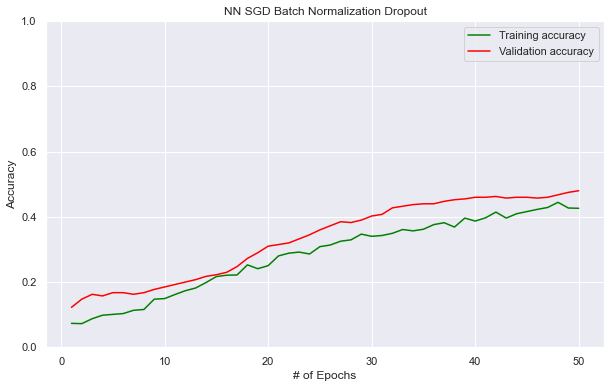

In [31]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('NN SGD Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The model starts off with comparable values for training and validation accuracy. As the number of epochs increases, the validation accuracy increases, indicating that the model learns well

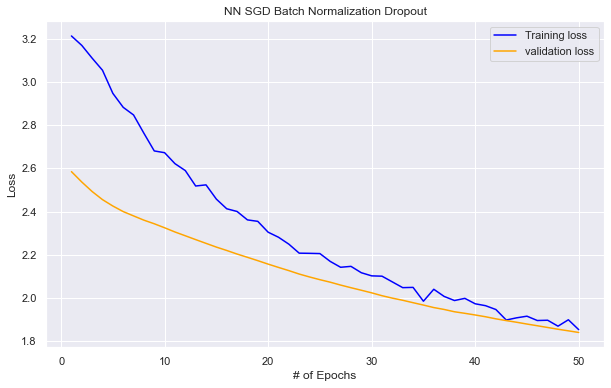

In [32]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('NN SGD Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### There is a steady decrease in loss in both training and validation. The validation loss exhibits a smooth decrease as we run more epochs and seems to be stabilizing around 50 epochs, which also indicates a network with good learning

#### The validation accuracy value of ~45-50% for SGD seems to be low. Let us see if other optimizers provide higher accuracy 

#### <font color='blue'>Next, we will train the model using Adam Optimizer. The Notebook processing pauses here so that we can use the GUI for training the model and saving the weights. The notebook continues to process after this step</font>

In [33]:
if __name__ == "__main__": 
    # create a GUI window 
    win = tk.Tk() 

    # set the background colour of GUI window 
    win.configure(background="gray") 
 
    # set the title of GUI window 
    win.title("Neural Networks GUI - Great Learning") 
 
    # set the configuration of GUI window 
    win.geometry("1000x500") 
    
    #File Name
    filename = ttk.Label(win,width=30,text="Step 1 : Data loaded from:")
    filename.grid(row=0,column=0,sticky=tk.W)

    filename_val = ttk.Label(win,width=30,text=df_Name)
    filename_val.grid(row=0,column=2,sticky=tk.W)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=4,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=4,column=2)
    
    #Target Column
    tgtcol_name = ttk.Label(win,width=30,text="Step 2 : Target Column Found as:")
    tgtcol_name.grid(row=6,column=0,sticky=tk.W)

    tgtcol_name_val = ttk.Label(win,width=30,text=tgtcol_val)
    tgtcol_name_val.grid(row=6,column=2,sticky=tk.W)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=8,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=8,column=2)

    #Trained Regressor
    tgtcol_name = ttk.Label(win,width=30,text="Step 3 : Neural Network Regressor")
    tgtcol_name.grid(row=10,column=0,sticky=tk.W)

    tgtcol_name_val = ttk.Label(win,width=30,text="Model Trained & Saved")
    tgtcol_name_val.grid(row=10,column=2,sticky=tk.W)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=12,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=12,column=2)

    
    def Train_Classification():
        
        global history
        
        adam_optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
        model_class.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
        history = model_class.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)        
        
        Confirm_entrybox=ttk.Entry(win,width=24)
        Confirm_entrybox.grid(row=18,column=6)
        Confirm_entrybox.insert(1,str("Network Trained"))


    def Save_Model():
        # Save the model weights for future use
        model_class.save_weights("ss_classifier")
        Confirm_entrybox=ttk.Entry(win,width=24)
        Confirm_entrybox.grid(row=20,column=6)
        Confirm_entrybox.insert(1,str("Saved Model to Disk"))
        
        Proceed_Button = ttk.Button(win, width=30,text='Click to Proceed',command=PreProcess_Data)
        Proceed_Button.grid(row=22,column=6)

    def PreProcess_Data():
        win.destroy()
        
    #Neural Network Regressor
    nn_res = ttk.Label(win,width=30,text="Step 4 : Neural Network Classifier")
    nn_res.grid(row=14,column=0)
    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=14,column=2)

    filler = ttk.Label(win,width=30,text="")
    filler.grid(row=16,column=0)

    nn_res = ttk.Label(win,width=30,text="Classification")
    nn_res.grid(row=16,column=2,sticky=tk.W)
    
    Run_Reg_Button = ttk.Button(win, text='Train',command=Train_Classification)
    Run_Reg_Button.grid(row=18,column=4)

    Save_Model_Button = ttk.Button(win, text='Pickle',command=Save_Model)
    Save_Model_Button.grid(row=20,column=4)
    
    # start the GUI 
    win.mainloop()
    

Train on 1199 samples, validate on 400 samples
Epoch 1/50
1199/1199 [==============================] - 1s 600us/sample - loss: 1.7713 - accuracy: 0.4896 - val_loss: 1.7708 - val_accuracy: 0.5100
Epoch 2/50
1199/1199 [==============================] - 0s 47us/sample - loss: 1.6036 - accuracy: 0.5530 - val_loss: 1.6839 - val_accuracy: 0.5425
Epoch 3/50
1199/1199 [==============================] - 0s 50us/sample - loss: 1.4525 - accuracy: 0.5721 - val_loss: 1.5682 - val_accuracy: 0.5525
Epoch 4/50
1199/1199 [==============================] - 0s 47us/sample - loss: 1.3887 - accuracy: 0.5663 - val_loss: 1.5360 - val_accuracy: 0.5725
Epoch 5/50
1199/1199 [==============================] - 0s 44us/sample - loss: 1.2964 - accuracy: 0.5938 - val_loss: 1.4804 - val_accuracy: 0.5725
Epoch 6/50
1199/1199 [==============================] - 0s 46us/sample - loss: 1.2548 - accuracy: 0.6113 - val_loss: 1.4541 - val_accuracy: 0.5525
Epoch 7/50
1199/1199 [==============================] - 0s 45us/sample

In [34]:
results = model_class.evaluate(X_val, y_val)
print(model_class.metrics_names)
print(results)    

400/400 [==============================] - 0s 40us/sample - loss: 1.0630 - accuracy: 0.6150
['loss', 'accuracy']
[1.0630163860321045, 0.615]


In [35]:
tmp = pd.DataFrame({'Optimizer':['Adam'], 'Validation Accuracy (%)': [round(100*results[1],2)]},index={'2'})
table= pd.concat([table, tmp])
table = table[['Optimizer', 'Validation Accuracy (%)']]
table

,Optimizer,Validation Accuracy (%)
1,SGD,48.0
2,Adam,61.5


#### Adam seems to consistently provide a higher accuracy than SGD, usually by above ~10% 

#### Plot the training and validation accuracy for the Adam optimizer

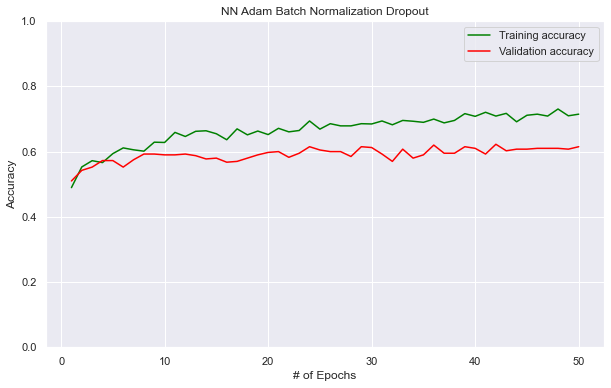

In [36]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('NN Adam Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Both the training and validation accuracy values converge at around 10 epochs and continue to remain comparable with increase in number of epochs

#### Plot the training and validation loss for the Adam optimizer

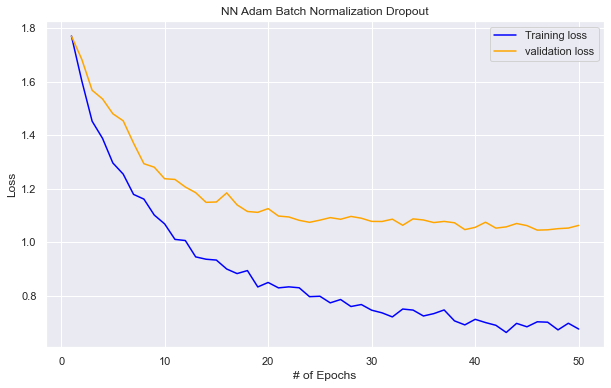

In [37]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('NN Adam Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Both training and validation losses decrease rapidly until about 30 epochs, after which they plateau out. The network learns well in the initial epochs 

#### Validation accuracy of around 55-60% for Adam is certainly better than that of SGD. By experimenting with different hyperparamters, the accuracy remains in that range. 

#### Since Adagrad works well on sparse data sets, let us see if it performs better than Adam

#### Next, we will train the model using Adagrad Optimizer

In [38]:
adagrad_optimizer = tensorflow.keras.optimizers.Adagrad(lr=0.001)
#adadelta_optimizer = tensorflow.keras.optimizers.Adadelta(lr=2,rho=0.5)
model_class.compile(optimizer=adagrad_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_class.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 1199 samples, validate on 400 samples
Epoch 1/50
1199/1199 [==============================] - 1s 557us/sample - loss: 0.6430 - accuracy: 0.7298 - val_loss: 1.0602 - val_accuracy: 0.6175
Epoch 2/50
1199/1199 [==============================] - 0s 46us/sample - loss: 0.6722 - accuracy: 0.7164 - val_loss: 1.0587 - val_accuracy: 0.6200
Epoch 3/50
1199/1199 [==============================] - 0s 48us/sample - loss: 0.6773 - accuracy: 0.7273 - val_loss: 1.0582 - val_accuracy: 0.6175
Epoch 4/50
1199/1199 [==============================] - 0s 48us/sample - loss: 0.6513 - accuracy: 0.7364 - val_loss: 1.0562 - val_accuracy: 0.6175
Epoch 5/50
1199/1199 [==============================] - 0s 48us/sample - loss: 0.6420 - accuracy: 0.7223 - val_loss: 1.0552 - val_accuracy: 0.6175
Epoch 6/50
1199/1199 [==============================] - 0s 49us/sample - loss: 0.6772 - accuracy: 0.7156 - val_loss: 1.0551 - val_accuracy: 0.6150
Epoch 7/50
1199/1199 [==============================] - 0s 46us/sample

In [39]:
results = model_class.evaluate(X_val, y_val)
print(model_class.metrics_names)
print(results)    

400/400 [==============================] - 0s 32us/sample - loss: 1.0470 - accuracy: 0.6275
['loss', 'accuracy']
[1.047043571472168, 0.6275]


In [40]:
tmp = pd.DataFrame({'Optimizer':['Adagrad'], 'Validation Accuracy (%)': [round(100*results[1],2)]},index={'2'})
table= pd.concat([table, tmp])
table = table[['Optimizer', 'Validation Accuracy (%)']]
table

,Optimizer,Validation Accuracy (%)
1,SGD,48.00
2,Adam,61.50
2,Adagrad,62.75


#### The accuracy of Adagrad is almost always comparable to Adam at around ~60%

#### Plot the training and validation accuracy for the Adagrad optimizer

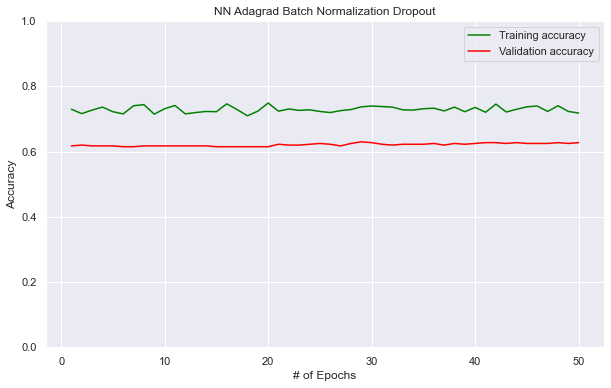

In [41]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('NN Adagrad Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The accuracy of training and validation data sets remains comparable across the number of epochs

#### Plot the training and validation loss for the Adagrad optimizer

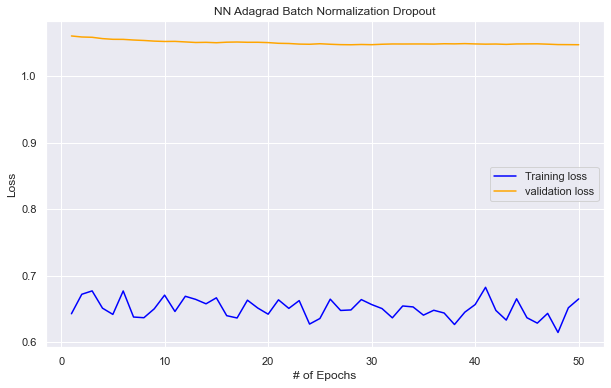

In [42]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('NN Adagrad Batch Normalization Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Validation loss remians significantly higher than the training loss. Adagrad starts with high validation accuracy but the network learnability seems to be low, as indicated by the plots

### Conclusion

#### 1. We built a vanilla neural network of 2 hidden layers with Relu activation. The network has a softmax activation in the output layer, which creates a one-hot encoded output matrix, on which categorical cross entropy loss is calculated, as required by a multi-class classification problem
#### 2. We initialize weights using He_Normal and use Batch Normalization/Dropout layers for regularization of the network
#### 3. We initialize other hyperparameters such as Activation Function, Epoch number, batch size and dropout ratio and hold them constant as we train the model across 3 different optimizers
#### 4. We trained the network using 3 different optimizers - SGD, Adam and Adagrad across 50 epochs and batch size 128 with a dropout of 0.1. We tried different permutations and combinations of hyperparameters like # of Epochs, Activation function, Learning rate, batch size, drop out ratios, # of neurons in hidden layer etc.
#### 5. SGD optimizer provided a steady fall in loss but the validation accuracy remains at ~50%
#### 6. Adam optimizer also provided a steady fall in loss but with a higher validation accuracy of ~60%
#### 7. Adagrad optimizer starts with a higher accuracy value but it remains almost constant across the number of epochs. The accuracy is of the same order as Adam i.e. ~60%
#### 8. It is observed that both Batch Normalization and Dropouts individually regularize the model and prevent overfitting.
#### 9. We saved the trained model and also it to predict the classes for randomly chosen images from the test data set. 
#### 10. We plotted the accuracy and loss vs # of epochs, for each of the models we trained

## Part 4 - SVHN Digit Classifier

### Load and visualize the data set

In [43]:
import h5py
f = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

#### Inspect the shapes of training and validation data sets

In [44]:
X_train=f['X_train']
X_test=f['X_test']

y_train=f['y_train']
y_test=f['y_test']

X_val=f['y_val']
y_val=f['y_val']


X_train = np.array(f["X_train"][:])
y_train = np.array(f["y_train"][:])

X_test = np.array(f["X_test"][:])
y_test = np.array(f["y_test"][:])

X_val = np.array(f["X_val"][:])
y_val = np.array(f["y_val"][:])

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)
print('Shape of x_val:',X_val.shape)
print('Shape of y_val:',y_val.shape)

Shape of X_train: (42000, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of y_train: (42000,)
Shape of y_test: (18000,)
Shape of x_val: (60000, 32, 32)
Shape of y_val: (60000,)


#### Visualize 20 random images and print out their corresponding labels  to understand the data set 

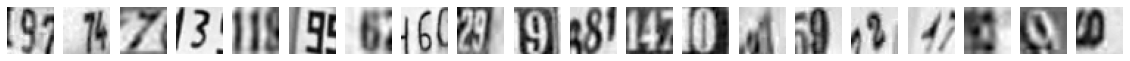

[9, 7, 7, 3, 1, 9, 6, 6, 9, 9, 8, 4, 0, 7, 9, 2, 4, 3, 9, 0]

In [45]:
%matplotlib inline
fig=plt.figure(figsize=(20,1))

randarr=[]
for i in range(20):
    rand = np.random.randint(0,18000)
    randarr.append(y_test[rand])
    plt.subplot(1, 20, i+1)
    plt.imshow(X_test[rand], cmap='gray')
    plt.axis('off')
plt.show()

randarr

#### Understand the maximum and minimum values in the data set. Since the data set is of grayscale images, the values range from 0 to 255

In [46]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

print("X_train varies from ",round(np.min(X_train)),' to ',round(np.max(X_train)))
print("y_train varies from ",round(np.min(y_train)),' to ',round(np.max(y_train)))
print("X_test varies from ",round(np.min(X_test)),' to ',round(np.max(X_test)))
print("y_test varies from ",round(np.min(y_test)),' to ',round(np.max(y_test)))

X_train varies from  0  to  255
y_train varies from  0  to  9
X_test varies from  0  to  255
y_test varies from  0  to  9


#### Normalize the training data set by dividing the entire data set by 255 

In [47]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_val /= 255

#### Summarize the number of data samples in the training and validation data sets

In [48]:
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_val.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Images in X_train: 42000
Images in X_test: 60000
Max value in X_train: 0.9999
Min value in X_train: 0.0


#### Convert the output labels into one hot vectors

In [49]:
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val,num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### Construct a basic neural network architecture consisting of 
#### 1. One Input layer with shape 1024
#### 2. Five fully connected hidden layers consisting of 500, 250, 125, 64, 32 neurons and Relu activation. We are using Kaiming He initializer to initialize the weights, which works well alongside Relu activation
#### 3. Output layer with softmax activation

In [50]:
act_fn='relu'
#act_fn='tanh'
#act_fn='sigmoid'

model_svhn = tensorflow.keras.models.Sequential()
model_svhn.add(tensorflow.keras.layers.Flatten())
model_svhn.add(tensorflow.keras.layers.Dense(500,kernel_initializer='he_normal',input_shape = (32*32, ),activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dense(250,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dense(125,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dense(64,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dense(32,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dense(10,activation = 'softmax'))

#### Initialize NN hyperparameters used for training the data set. In this assignment, different hyperparameter combinations were experimented by tweaking the values. The hyperparameters below were found to provide the optimal training and validation accuracies. 

#### We will use categorical crossentropy loss as this is a multi-class classification problem

In [51]:
batch_size=200
n_epochs=50
p=0.9
lr = 0.0001
dropout_ratio = 0.2

sgd_optimizer = tensorflow.keras.optimizers.SGD(lr=lr,nesterov=False,momentum=p)
adam_optimizer = tensorflow.keras.optimizers.Adam(lr=lr)

#### Compile and train basic Deep Neural Network (DNN) using Adam optimizer

In [52]:
model_svhn.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 67us/sample - loss: 2.2288 - accuracy: 0.1960 - val_loss: 2.0648 - val_accuracy: 0.3158
Epoch 2/50
42000/42000 [==============================] - 2s 57us/sample - loss: 1.8548 - accuracy: 0.3831 - val_loss: 1.6859 - val_accuracy: 0.4455
Epoch 3/50
42000/42000 [==============================] - 2s 57us/sample - loss: 1.5867 - accuracy: 0.4847 - val_loss: 1.5468 - val_accuracy: 0.4965
Epoch 4/50
42000/42000 [==============================] - 3s 63us/sample - loss: 1.4402 - accuracy: 0.5477 - val_loss: 1.4235 - val_accuracy: 0.5414
Epoch 5/50
42000/42000 [==============================] - 2s 58us/sample - loss: 1.3373 - accuracy: 0.5878 - val_loss: 1.2913 - val_accuracy: 0.6051
Epoch 6/50
42000/42000 [==============================] - 3s 62us/sample - loss: 1.2648 - accuracy: 0.6124 - val_loss: 1.2348 - val_accuracy: 0.6231
Epoch 7/50
42000/42000 [==============================] 

In [53]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 46us/sample - loss: 0.5825 - accuracy: 0.8258


In [54]:
table = pd.DataFrame({'Configuration':['Adam'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'1'})
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58


#### Adam optimizer used in a basic DNN provides a validation accuracy of ~84 %. This is a good number by itself but could there be a better optimizer? We will try Stochastic Gradient Descent optimizer as the next experiment, by keeping all other hyperparamters unchanged 

#### Plot the training and validation accuracy as a function of # of epochs

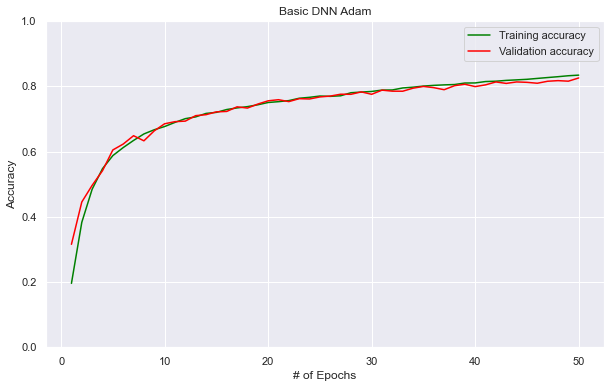

In [55]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('Basic DNN Adam')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Plot the training and validation loss as a function of # of epochs

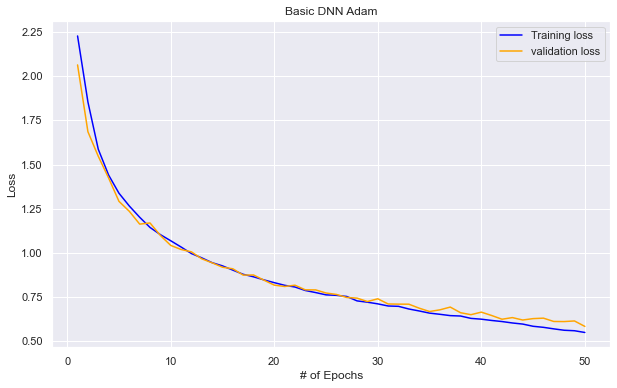

In [56]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Basic DNN Adam')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### As observed from the above plots
#### 1. Accuracy of validation data is higher than training data in the inital few epochs. However, they both converge to a single value as the number of epochs increases
#### 2. Loss of validation data is lower than training data in the initial few epochs and eventually, they converge. The model exhibits a good learning as indicated by the shape of the loss curve

#### There is a possibility that the model is overfitting

#### Compile and train basic DNN using Stochastic Gradient optimizer. Before we address the potential overfitting of a basic fully connected DNN, let us train it using an SGD optimizer to understand the performance, keeping all other hyperparametrs unchanged 

In [57]:
model_svhn.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 70us/sample - loss: 0.5014 - accuracy: 0.8518 - val_loss: 0.5467 - val_accuracy: 0.8395
Epoch 2/50
42000/42000 [==============================] - 3s 81us/sample - loss: 0.4947 - accuracy: 0.8544 - val_loss: 0.5443 - val_accuracy: 0.8396
Epoch 3/50
42000/42000 [==============================] - 3s 69us/sample - loss: 0.4922 - accuracy: 0.8542 - val_loss: 0.5428 - val_accuracy: 0.8410
Epoch 4/50
42000/42000 [==============================] - 3s 68us/sample - loss: 0.4908 - accuracy: 0.8547 - val_loss: 0.5417 - val_accuracy: 0.8414
Epoch 5/50
42000/42000 [==============================] - 3s 68us/sample - loss: 0.4897 - accuracy: 0.8545 - val_loss: 0.5423 - val_accuracy: 0.8403
Epoch 6/50
42000/42000 [==============================] - 3s 68us/sample - loss: 0.4889 - accuracy: 0.8546 - val_loss: 0.5403 - val_accuracy: 0.8408
Epoch 7/50
42000/42000 [==============================] 

In [58]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 2s 41us/sample - loss: 0.5216 - accuracy: 0.8459


In [59]:
tmp = pd.DataFrame({'Configuration':['SGD'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'2'})
table= pd.concat([table, tmp])
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58
2,SGD,84.59


#### SGD Optimizer provides a small incremental improvement in the model accuracy. Since this is not a significant performance jump, let us look at implementing regularization techniques to finetune the model

#### Plot the training and validation accuracy as a function of # of epochs

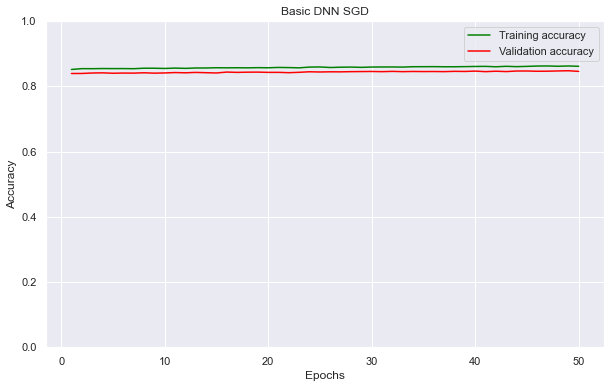

In [60]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, loss_train, 'green', label='Training accuracy')
plt.plot(epochs, loss_val, 'red', label='Validation accuracy')
plt.title('Basic DNN SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### It is interesting to note that both training and validation accuracies remain close to each other starting from the first to last epoch. This is likely a good indicator of a well performing model  

#### Plot the training and validation loss as a function of # of epochs

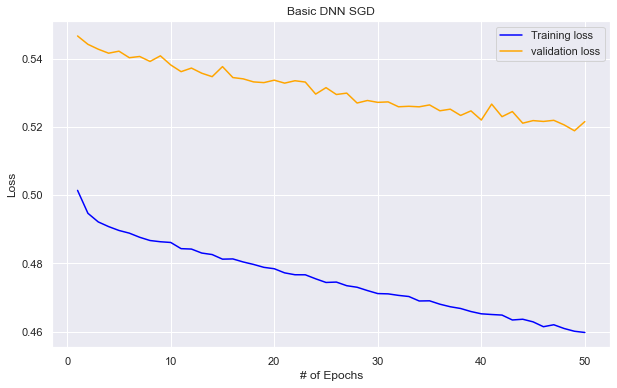

In [61]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Basic DNN SGD')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### The fall in loss for both training and validation data is pretty much identical

#### As a next step, we will try to apply regularization using batch normalization to see if this improves model performance. We add a  Batch Normalization layer after each fully connected layer but before the Relu activation layer

In [62]:
model_svhn = tensorflow.keras.models.Sequential()
model_svhn.add(tensorflow.keras.layers.Flatten())

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(500,kernel_initializer='he_normal',input_shape = (32*32, ),activation = act_fn))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(250,kernel_initializer='he_normal',activation = act_fn))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(125,kernel_initializer='he_normal',activation = act_fn))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(64,kernel_initializer='he_normal',activation = act_fn))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(32,kernel_initializer='he_normal',activation = act_fn))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(10,activation = 'softmax'))

#### Initially, we will experiment with Batch Normalization implementation using Adam optimizer. The same hyperparamters used for a basic DNN are left unchanged

In [63]:
model_svhn.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 6s 142us/sample - loss: 1.6443 - accuracy: 0.4645 - val_loss: 1.4782 - val_accuracy: 0.5798
Epoch 2/50
42000/42000 [==============================] - 5s 111us/sample - loss: 1.0821 - accuracy: 0.6697 - val_loss: 0.9530 - val_accuracy: 0.7155
Epoch 3/50
42000/42000 [==============================] - 5s 124us/sample - loss: 0.9107 - accuracy: 0.7209 - val_loss: 0.8494 - val_accuracy: 0.7396
Epoch 4/50
42000/42000 [==============================] - 5s 117us/sample - loss: 0.8021 - accuracy: 0.7535 - val_loss: 0.7339 - val_accuracy: 0.7758
Epoch 5/50
42000/42000 [==============================] - 5s 123us/sample - loss: 0.7244 - accuracy: 0.7786 - val_loss: 0.6655 - val_accuracy: 0.7985
Epoch 6/50
42000/42000 [==============================] - 5s 120us/sample - loss: 0.6674 - accuracy: 0.7941 - val_loss: 0.6387 - val_accuracy: 0.8069
Epoch 7/50
42000/42000 [==========================

In [64]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 56us/sample - loss: 0.3010 - accuracy: 0.9260


In [65]:
tmp = pd.DataFrame({'Configuration':['Adam-Batch Norm'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'3'})
table= pd.concat([table, tmp])
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58
2,SGD,84.59
3,Adam-Batch Norm,92.60


#### Adding Batch Normalization stabilized the network and the performance increased significantly by about ~8 percentage points using Adam optimizer. As next step, we will use Batch normalization with SGD optimizer (which seems to be perform better than Adam) to see if there is further improvement

#### Plot the training and validation accuracy as a function of # of epochs

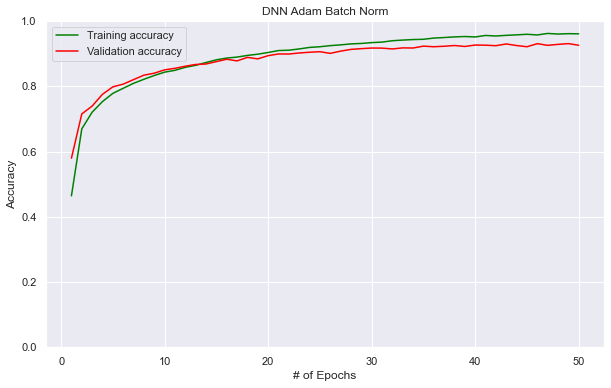

In [66]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('DNN Adam Batch Norm')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The validation accuracy is higher than trainign accuracy in the intial few epochs, but decreases with the number of epochs. This is similar to what we observed even without batch normalization. However, the final validation accuracy is above 90% , which indicates good improvement in model performance 

#### Plot the training and validation loss as a function of # of epochs

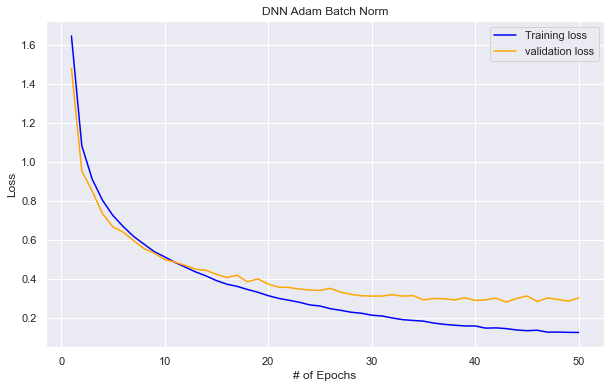

In [67]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('DNN Adam Batch Norm')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Training loss starts off higher than validation loss , but decreases much rapidly than validation loss. 

#### In the past runs, we observed that SGD performed slightly better than Adam. Also, introducing Batch Normalization enhanced model performance. So we can expect the model to perform with high accuracy if we combine the power of SGD and Batch Normalization

In [68]:
model_svhn.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 6s 136us/sample - loss: 0.0917 - accuracy: 0.9742 - val_loss: 0.2540 - val_accuracy: 0.9407
Epoch 2/50
42000/42000 [==============================] - 5s 111us/sample - loss: 0.0808 - accuracy: 0.9776 - val_loss: 0.2494 - val_accuracy: 0.9424
Epoch 3/50
42000/42000 [==============================] - 5s 108us/sample - loss: 0.0734 - accuracy: 0.9809 - val_loss: 0.2478 - val_accuracy: 0.9431
Epoch 4/50
42000/42000 [==============================] - 5s 108us/sample - loss: 0.0705 - accuracy: 0.9824 - val_loss: 0.2466 - val_accuracy: 0.9433
Epoch 5/50
42000/42000 [==============================] - 5s 117us/sample - loss: 0.0693 - accuracy: 0.9824 - val_loss: 0.2458 - val_accuracy: 0.9436
Epoch 6/50
42000/42000 [==============================] - 5s 111us/sample - loss: 0.0686 - accuracy: 0.9826 - val_loss: 0.2458 - val_accuracy: 0.9436
Epoch 7/50
42000/42000 [==========================

In [69]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 57us/sample - loss: 0.2459 - accuracy: 0.9445


In [70]:
tmp = pd.DataFrame({'Configuration':['SGD - Batch Norm'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'4'})
table= pd.concat([table, tmp])
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58
2,SGD,84.59
3,Adam-Batch Norm,92.60
4,SGD - Batch Norm,94.45


#### As expected, the combined power of SGD and Batch Normalization gives a significant uplift in model accuracy, driving it close to ~95%

#### Plot the training and validation accuracy as a function of # of epochs

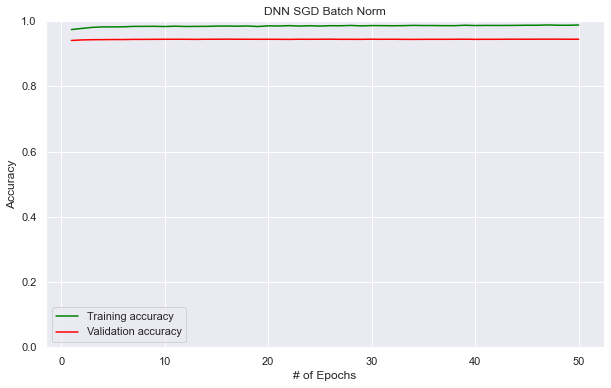

In [71]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('DNN SGD Batch Norm')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Validation accuracy starts off and remains slightly below training accuracy with the number of epochs. The final accuracy number is quite good

#### Plot the training and validation loss as a function of # of epochs

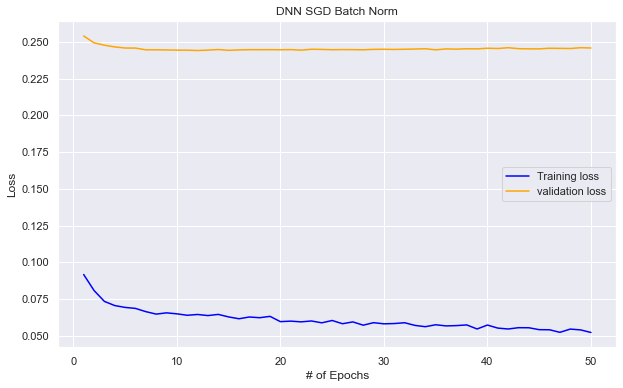

In [72]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('DNN SGD Batch Norm')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Training and validation loss decrease with almost the same trend

#### Implement a Dropout layer in addition to Batch Normalization

In [73]:
model_svhn = tensorflow.keras.models.Sequential()
model_svhn.add(tensorflow.keras.layers.Flatten())

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(500,kernel_initializer='he_normal',input_shape = (32*32, ),activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dropout(dropout_ratio))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(250,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dropout(dropout_ratio))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(125,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dropout(dropout_ratio))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(64,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dropout(dropout_ratio))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(32,kernel_initializer='he_normal',activation = act_fn))
model_svhn.add(tensorflow.keras.layers.Dropout(dropout_ratio))

model_svhn.add(tensorflow.keras.layers.BatchNormalization())
model_svhn.add(tensorflow.keras.layers.Dense(10,activation = 'softmax'))

#### Now that Batch Normalization is seen to provide good performance, there is an opportunity to prevent further overfitting using Weight Dropouts across all layers. We will train the network enhanced with both batch normalization and dropout using Adam optimizer.  

In [74]:
model_svhn.compile(optimizer=adam_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 7s 174us/sample - loss: 2.5002 - accuracy: 0.1474 - val_loss: 2.1196 - val_accuracy: 0.2336
Epoch 2/50
42000/42000 [==============================] - 5s 128us/sample - loss: 2.1037 - accuracy: 0.2435 - val_loss: 1.7403 - val_accuracy: 0.4242
Epoch 3/50
42000/42000 [==============================] - 5s 128us/sample - loss: 1.8937 - accuracy: 0.3238 - val_loss: 1.5218 - val_accuracy: 0.5413
Epoch 4/50
42000/42000 [==============================] - 5s 123us/sample - loss: 1.7454 - accuracy: 0.3855 - val_loss: 1.3682 - val_accuracy: 0.6036
Epoch 5/50
42000/42000 [==============================] - 6s 137us/sample - loss: 1.6177 - accuracy: 0.4446 - val_loss: 1.2505 - val_accuracy: 0.6510
Epoch 6/50
42000/42000 [==============================] - 6s 134us/sample - loss: 1.5211 - accuracy: 0.4883 - val_loss: 1.1589 - val_accuracy: 0.6833
Epoch 7/50
42000/42000 [==========================

In [75]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 4s 60us/sample - loss: 0.3632 - accuracy: 0.8942


In [76]:
tmp = pd.DataFrame({'Configuration':['Adam - Batch Norm - Dropout'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'5'})
table= pd.concat([table, tmp])
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58
2,SGD,84.59
3,Adam-Batch Norm,92.60
4,SGD - Batch Norm,94.45
5,Adam - Batch Norm - Dropout,89.42


#### Adding a dropout certainly makes the model perform better than without it, however it does not provide incremental improvement over Batch Normalization. As next step, we will perform the same experiment with SGD optimizer to complete the analysis

#### Plot the training and validation accuracy as a function of # of epochs

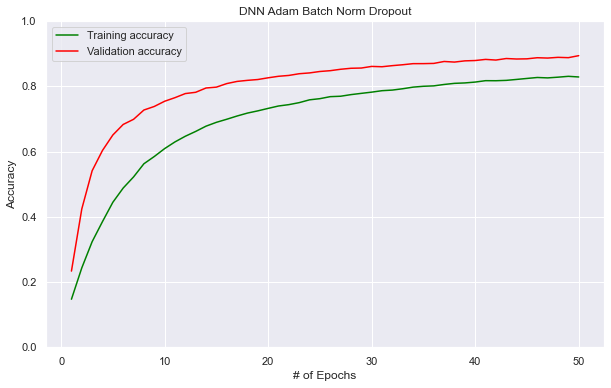

In [77]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('DNN Adam Batch Norm Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Validation accuracy starts off higher than training accuracy and remains consistently higher than training accuracy. This could mean that the weight dropouts significantly reduce model overfitting

#### Plot the training and validation loss as a function of # of epochs

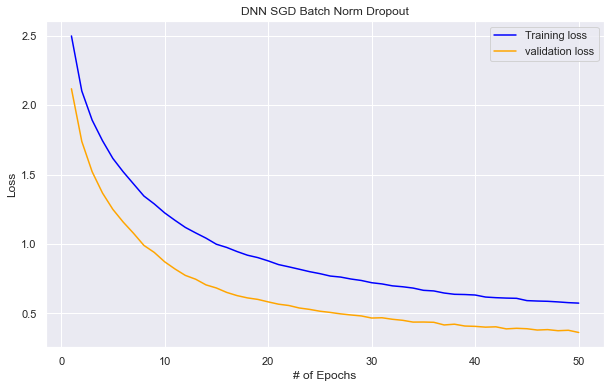

In [78]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('DNN SGD Batch Norm Dropout')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### The netowrk exhibits good learning with a consistent decrease in loss with the number of epochs 

#### As the final experiment, we will try SGD optimizer with Batch Normalization & Dropout layers implemented

In [79]:
model_svhn.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',  metrics = ['accuracy'])
history = model_svhn.fit(X_train,y_train,epochs=n_epochs,validation_data=(X_val,y_val),batch_size=batch_size)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 8s 185us/sample - loss: 0.5427 - accuracy: 0.8410 - val_loss: 0.3524 - val_accuracy: 0.8975
Epoch 2/50
42000/42000 [==============================] - 5s 129us/sample - loss: 0.5325 - accuracy: 0.8452 - val_loss: 0.3494 - val_accuracy: 0.8993
Epoch 3/50
42000/42000 [==============================] - 5s 130us/sample - loss: 0.5300 - accuracy: 0.8445 - val_loss: 0.3477 - val_accuracy: 0.8999
Epoch 4/50
42000/42000 [==============================] - 5s 130us/sample - loss: 0.5201 - accuracy: 0.8458 - val_loss: 0.3461 - val_accuracy: 0.9004
Epoch 5/50
42000/42000 [==============================] - 5s 122us/sample - loss: 0.5281 - accuracy: 0.8459 - val_loss: 0.3449 - val_accuracy: 0.9004
Epoch 6/50
42000/42000 [==============================] - 5s 122us/sample - loss: 0.5287 - accuracy: 0.8453 - val_loss: 0.3440 - val_accuracy: 0.9005
Epoch 7/50
42000/42000 [==========================

In [80]:
res = model_svhn.evaluate(X_val, y_val)

60000/60000 [==============================] - 3s 58us/sample - loss: 0.3279 - accuracy: 0.9054


In [81]:
tmp = pd.DataFrame({'Configuration':['SGD - Batch Norm - Dropout'], 'Validation Accuracy (%)': [round(100*res[1],2)]},index={'6'})
table= pd.concat([table, tmp])
table = table[['Configuration', 'Validation Accuracy (%)']]
table

,Configuration,Validation Accuracy (%)
1,Adam,82.58
2,SGD,84.59
3,Adam-Batch Norm,92.60
4,SGD - Batch Norm,94.45
5,Adam - Batch Norm - Dropout,89.42
6,SGD - Batch Norm - Dropout,90.54


#### In line with our earlier observations, dropout does not add to the performance of Batch normalization, but it acts as a good regualizer by its own. 

#### Plot the training and validation accuracy as a function of # of epochs

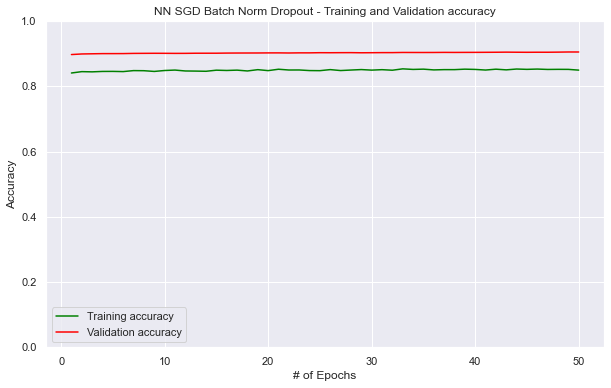

In [82]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.ylim(0,1)
plt.plot(epochs, acc_train, 'green', label='Training accuracy')
plt.plot(epochs, acc_val, 'red', label='Validation accuracy')
plt.title('NN SGD Batch Norm Dropout - Training and Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Validation accuracy starts off and remains slightly above training accuracy with the number of epochs. The final accuracy number is quite good

#### Plot the training and validation loss as a function of # of epochs

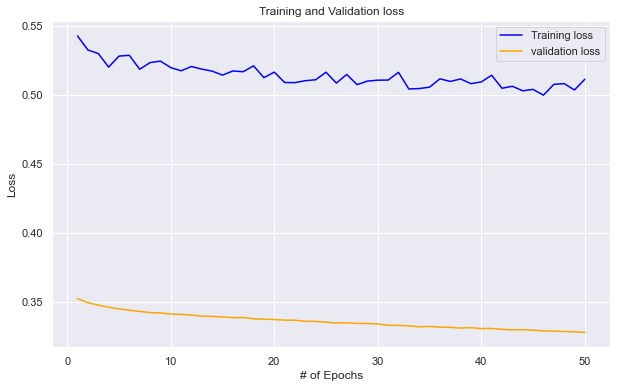

In [83]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,n_epochs+1)
plt.subplots(figsize=(10,6))
plt.plot(epochs, loss_train, 'blue', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### The network exhibits good learning with a consistent decrease in loss with the number of epochs  

#### We will store the trained model's weights for future use

In [84]:
model_svhn.save_weights("svhn_classifier")

#### Using the model trained above, let us try to predict the digits for a random sample of data points from the test data set

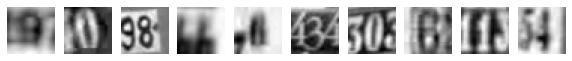

[9, 0, 8, 4, 6, 3, 0, 6, 1, 4]

In [85]:
%matplotlib inline
fig=plt.figure(figsize=(10,1))

randarr=[]
for i in range(10):
    rand = np.random.randint(0,18000)
    randarr.append(model_svhn.predict_classes(X_test)[rand])
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[rand], cmap='gray')
    plt.axis('off')
plt.show()

randarr

### Conclusion 

#### 1. The dataset consists of training and validation images (32x32) that we loaded and visualized. Each data sample has a label depicting the most viible number in the image 
#### 2. We scaled the train and test data to normaliz them. Also we one-hot encoded the output data so that we can determing the categorical cross entropy loss, required for a multi-class classification problem
#### 3. The We built a vanilla Deep Neural network with 5 hidden layers and trained SGD and Adam optimizers on it, which provided validation accuracy of ~84 and ~87 respectively
#### 4. We added Batch Normalization layers before the activation function and kept the other hyperparameters the same. This bumped up the accuracy levels of SGD and Adam to above 90%. SGD has higher slighlty higer accuracy than Adam. Clearly, Batch Normalization helps is regularizing the network and prevents overfitting
#### 5. In an attempt for further regularization, we added the dropout layers (0.2) at each hidden layer. The accuracy values decreased from having pure Batch Normalization but remained higher than an unregularized Vanilla neural network 
#### 6. It is observed that both Batch Normalization and Dropouts individually regularize the model and prevent overfitting. In this case, Batch normalization makes the models perform better compared to dropouts
#### 7. We tried different permutations and combinations of hyperparameters like # of Epochs, Activation function, Learning rate, batch size, drop out ratios, # of neurons in hidden layer etc. The relative performance of different experiments was the same when the hyperparameters were kept the same i.e. SGD Batch Normalization always gave the highest validation accuracy
#### 8. We saved the trained model and also it to predict the classes for randomly chosen images from the test data set. The model was able to preidct the numbers accurately, in majority of the case 
#### 9. We plotted the accuracy and loss vs # of epochs, for each of the models we trained